In [1]:
# load dataset and convert to pandas dataframe
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# def perceptron with binstep activation
def perceptron(x, w, b):
    # perceptron function
    z = (np.dot(x, w) + b)
    if z > 0.0:
        a = 1
    else:
        a = 0
    return a

def prediction(x, w, b):
    # forward pass 
    y_hat = np.array([])
    
    for x_i in x.values:
        y_hat = np.append(y_hat, perceptron(x_i, w, b))
    return y_hat

def perceptron_train(x, y, learning_rate = 0.01, epochs = 50):
    # (x, y) is the set of training examples
    n_features = x.shape[1] 
    w = np.random.rand(n_features) # weight vector initialization with random values
    b = np.random.rand() # random bias
    for e in range(epochs):
        for x_i, y_i in zip(x, y):
            y_hat = perceptron(x_i, w, b) # prediction
            # (y_i - y_hat) being the partial derivative for the loss over the bias
            w = w + learning_rate * (y_i - y_hat) * x_i # weights update
            b = b + learning_rate * (y_i - y_hat) # bias update
    return (w, b)


# BINARY CLASSIFICATION USING IRIS DATASET

# loading dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["label"] = iris.target

# dataset examination
df.head();
df["label"].value_counts(); # 50 examples for each class (3 classes!)
df = df[df["label"] != 2].reset_index(drop=True)

# data preparation for training
x = df.drop("label", axis = 1)
y = df["label"]

# TRAINING
lr = 0.1 

# the training result is basically the weight vector and the bias
(w, b) = perceptron_train(x.values, y.values, lr, epochs = 5) 

# use the perceptron to predict the irises' types
prediction_df = x
y_hat = prediction(prediction_df, w, b)
prediction_df["label"] = y_hat

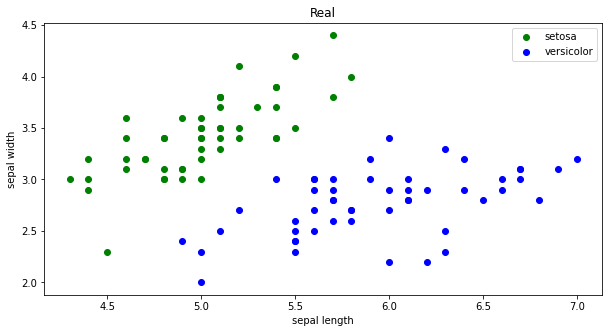

In [2]:
plt.figure(figsize=(10, 5))
plt.clf()

for df, title, plot_number in [(df, "Real", 1)]:
    plt.scatter(df[df["label"] == 0].iloc[:,0], df[df["label"] == 0].iloc[:,1], c = "green", label = "setosa")
    plt.scatter(df[df["label"] == 1].iloc[:,0], df[df["label"] == 1].iloc[:,1], c = "blue", label = "versicolor")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)
    plt.legend()

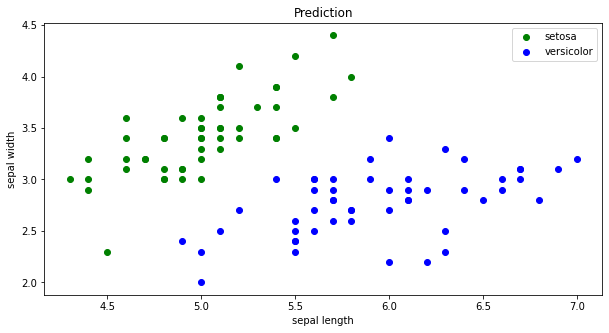

In [3]:
plt.figure(figsize=(10, 5))
plt.clf()

for df, title, plot_number in [(prediction_df, "Prediction", 2)]:
    plt.scatter(df[df["label"] == 0].iloc[:,0], df[df["label"] == 0].iloc[:,1], c="green", label="setosa")
    plt.scatter(df[df["label"] == 1].iloc[:,0], df[df["label"] == 1].iloc[:,1], c="blue", label="versicolor")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)
    plt.legend()  

In [4]:
# MULTINOMIAL CLASSIFICATION USING IRIS DATASET AND ONE VS REST APPROACH

# loading dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["label"] = iris.target

# Remember how the One-vs-Rest approach works.
# For every class a binary classifier (here perceptron) is trained. 
# For this the dataset has to be adapted such that 2 (of 3) classes are combined to one.
# In this example I will change the labels in such a way, that the negative labels are 0 respectively and the classified class will be labeled as 1.

# Dataset preprocessing for labeling
# class datasets
c1 = df[df["label"]==0]
c2 = df[df["label"]==1]
c3 = df[df["label"]==2]

# setting labels to 1 for each class set
c1 = c1.assign(label = 1)
c2 = c2.assign(label = 1)
c3 = c3.assign(label = 1)

# setting labels to 0 for each class set
n1 = c1.assign(label = 0)
n2 = c2.assign(label = 0)
n3 = c3.assign(label = 0)

# dataset combinations
combination1 = [c1,n2,n3]
combination2 = [n1,c2,n3]
combination3 = [n1,n2,c3]

# building datasets
d1 = pd.concat(combination1)
d2 = pd.concat(combination2)
d3 = pd.concat(combination3)

# splitting for training
x1 = d1.drop("label", axis = 1)
y1 = d1["label"]
x2 = d2.drop("label", axis = 1)
y2 = d2["label"]
x3 = d3.drop("label", axis = 1)
y3 = d3["label"]

In [5]:
# Training three binary classifiers
lr=0.1
(w1, b1) = perceptron_train(x1.values, y1.values, lr, epochs = 200) 
(w2, b2) = perceptron_train(x2.values, y2.values, lr, epochs = 200) 
(w3, b3) = perceptron_train(x3.values, y3.values, lr, epochs = 200) 

weight_bias_pairs = [(w1,b1),(w2,b2),(w3,b3)]

In [6]:
def multi_prediction(x,weight_bias_pairs):
    i = 0
    predictions = pd.DataFrame(x.index)
    output = predictions 
    for (w,b) in weight_bias_pairs:
        pred = prediction(x,w,b)
        predictions[i] = pred
        i+=1
    labels = np.array([])
    for row in predictions.iterrows():
        if sum([row[1][0],row[1][1],row[1][2]]) != 1:
            labels = np.append(labels,5)
        elif row[1][0]== 1:
            labels = np.append(labels,0)
        elif row[1][1]== 1:
            labels = np.append(labels,1)
        elif row[1][2]== 1:
            labels = np.append(labels,2)
    
    return labels

In [7]:
predictions = multi_prediction(x1,weight_bias_pairs)
predictions_df = df
predictions_df["label"] = predictions

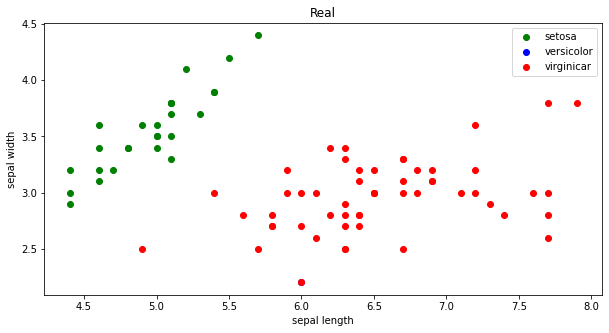

In [8]:
plt.figure(figsize=(10, 5))
plt.clf()
for df, title, plot_number in [(df, "Real", 3)]:
    plt.scatter(df[df["label"] == 0].iloc[:,0], df[df["label"] == 0].iloc[:,1], c = "green", label = "setosa")
    plt.scatter(df[df["label"] == 1].iloc[:,0], df[df["label"] == 1].iloc[:,1], c = "blue", label = "versicolor")
    plt.scatter(df[df["label"] == 2].iloc[:,0], df[df["label"] == 2].iloc[:,1], c = "red", label = "virginicar")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)
    plt.legend()

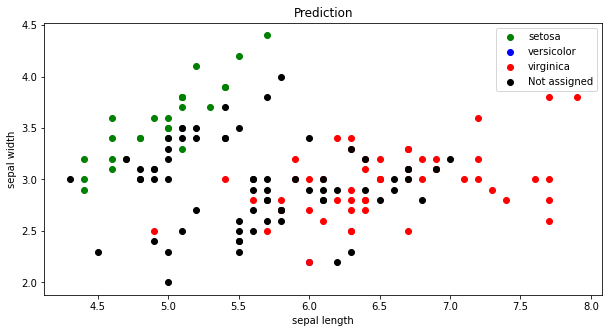

In [9]:
plt.figure(figsize=(10, 5))
plt.clf()

for df, title, plot_number in [(predictions_df, "Prediction", 4)]:
    plt.scatter(df[df["label"] == 0].iloc[:,0], df[df["label"] == 0].iloc[:,1], c="green", label="setosa")
    plt.scatter(df[df["label"] == 1].iloc[:,0], df[df["label"] == 1].iloc[:,1], c="blue", label="versicolor")
    plt.scatter(df[df["label"] == 2].iloc[:,0], df[df["label"] == 2].iloc[:,1], c = "red", label = "virginica")
    plt.scatter(df[df["label"] == 5].iloc[:,0], df[df["label"] == 5].iloc[:,1], c = "black", label = "Not assigned")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)
    plt.legend()  